# Nhóm TN
- `Vũ Công Thắng - 22521342`
- `Lê Cao Nguyên - 22520970`

---

# Tabels contents

1. Kết nối với Drive
2. Chia dữ liệu sử dụng `StratifiedKFold`
3. Thống kê dữ liệu
4. Trực quan hóa dữ liệu


# Kết nối với Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

root_dir = '/content/drive/MyDrive/Colab_Notebooks/Public'
original_labels = ["Honda", "Others", "VinFast", "KIA", "Hyundai", "Toyota", "Suzuki", "Mitsubishi", "Mazda"]


Mounted at /content/drive


# Chia dữ liệu sử dụng StratifiedKFold
1. Đọc folder `Public`
 - Đọc các tệp hình ảnh từ các thư mục tương ứng với nhãn.
 - Sắp xếp các nhãn ban đầu thành một danh sách được sắp xếp hợp lý.
 - Tạo `all_data` có columns = [path, label].

In [3]:
import os
import glob
import csv
from sklearn.model_selection import train_test_split

def read_file(root_dir, original_labels):
    sorted_labels = ["Others"] + sorted([label for label in original_labels if label != "Others"])
    categories = {label: idx for idx, label in enumerate(sorted_labels)}
    all_data = []

    for name, id in categories.items():
        car_path = os.path.join(root_dir, name)
        os.makedirs(car_path, exist_ok=True)  # Đảm bảo thư mục đã tồn tại

        for image_path in glob.glob(os.path.join(car_path, "*.jpg")):
            all_data.append((image_path, id))  # Lưu trữ (đường dẫn, nhãn)

    return all_data

all_data = read_file(root_dir=root_dir, original_labels=original_labels)


2. Lưu trữ vào CSV
 - Sử dụng hàm `save_to_csv()` để lưu dữ liệu vào tệp CSV.

In [4]:
def save_to_csv(data, file_path):
    with open(file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['path', 'label'])  # Ghi tiêu đề cột
        for row in data:
            writer.writerow(row)  # Ghi dữ liệu vào file

save_to_csv(all_data, 'CarDataset.csv')


3. Sử dụng StratifiedKFold
 - Phân chia dữ liệu thành các tập train và test với 5 split.
 - Lưu vào các tệp CSV riêng biệt.

In [5]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold

def read_csv(file_path):
    df = pd.read_csv(file_path)
    return df

df = read_csv('CarDataset.csv')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(skf.split(df, df['label']), start=1):
    train_df = df.iloc[train_index]
    test_df = df.iloc[test_index]

    train_filename = f'CarDataset-Splits-{fold}-Train.csv'

    test_filename = f'CarDataset-Splits-{fold}-Test.csv'

    train_df.to_csv(train_filename, index=False)
    test_df.to_csv(test_filename, index=False)

    print(f'Split-{fold}: Train: {train_filename}, Test: {test_filename}')


Split-1: Train: CarDataset-Splits-1-Train.csv, Test: CarDataset-Splits-1-Test.csv
Split-2: Train: CarDataset-Splits-2-Train.csv, Test: CarDataset-Splits-2-Test.csv
Split-3: Train: CarDataset-Splits-3-Train.csv, Test: CarDataset-Splits-3-Test.csv
Split-4: Train: CarDataset-Splits-4-Train.csv, Test: CarDataset-Splits-4-Test.csv
Split-5: Train: CarDataset-Splits-5-Train.csv, Test: CarDataset-Splits-5-Test.csv


# Thống kê dữ liệu

In [6]:
import pandas as pd

def summarize_data(split_number):
    # Đọc tập tin Train
    train_filename = f'CarDataset-Splits-{split_number}-Train.csv'
    train_df = pd.read_csv(train_filename)

    # Đọc tập tin Test
    test_filename = f'CarDataset-Splits-{split_number}-Test.csv'
    test_df = pd.read_csv(test_filename)

    # Thống kê số lượng ảnh theo labels
    train_counts = train_df['label'].value_counts()
    test_counts = test_df['label'].value_counts()

    print(f'Split-{split_number} Train:')
    print(train_counts)

    print(f'Split-{split_number} Test:')
    print(test_counts)
    print('---' * 10)

# Gọi hàm cho từng split từ 1 đến 5
for i in range(1, 6):
    summarize_data(i)


Split-1 Train:
label
6    5241
7    4615
0    3648
2    2739
3    2549
4    2536
1    2500
5    2288
8    2250
Name: count, dtype: int64
Split-1 Test:
label
6    1311
7    1153
0     912
2     685
3     638
4     633
1     625
5     572
8     563
Name: count, dtype: int64
------------------------------
Split-2 Train:
label
6    5241
7    4615
0    3648
2    2739
3    2550
4    2535
1    2500
5    2288
8    2250
Name: count, dtype: int64
Split-2 Test:
label
6    1311
7    1153
0     912
2     685
3     637
4     634
1     625
5     572
8     563
Name: count, dtype: int64
------------------------------
Split-3 Train:
label
6    5242
7    4614
0    3648
2    2739
3    2550
4    2535
1    2500
5    2288
8    2250
Name: count, dtype: int64
Split-3 Test:
label
6    1310
7    1154
0     912
2     685
3     637
4     634
1     625
5     572
8     563
Name: count, dtype: int64
------------------------------
Split-4 Train:
label
6    5242
7    4614
0    3648
2    2739
3    2550
4    2535
1    25

# Trực quan hóa dữ liệu
 - Sử dụng `Viz_data()` với `random_state = 4` để hiển thị các ảnh từ dữ liệu training của mỗi split.

In [ ]:
NumImgsPerRow = 10
ImgHeight = ImgWidth = 150

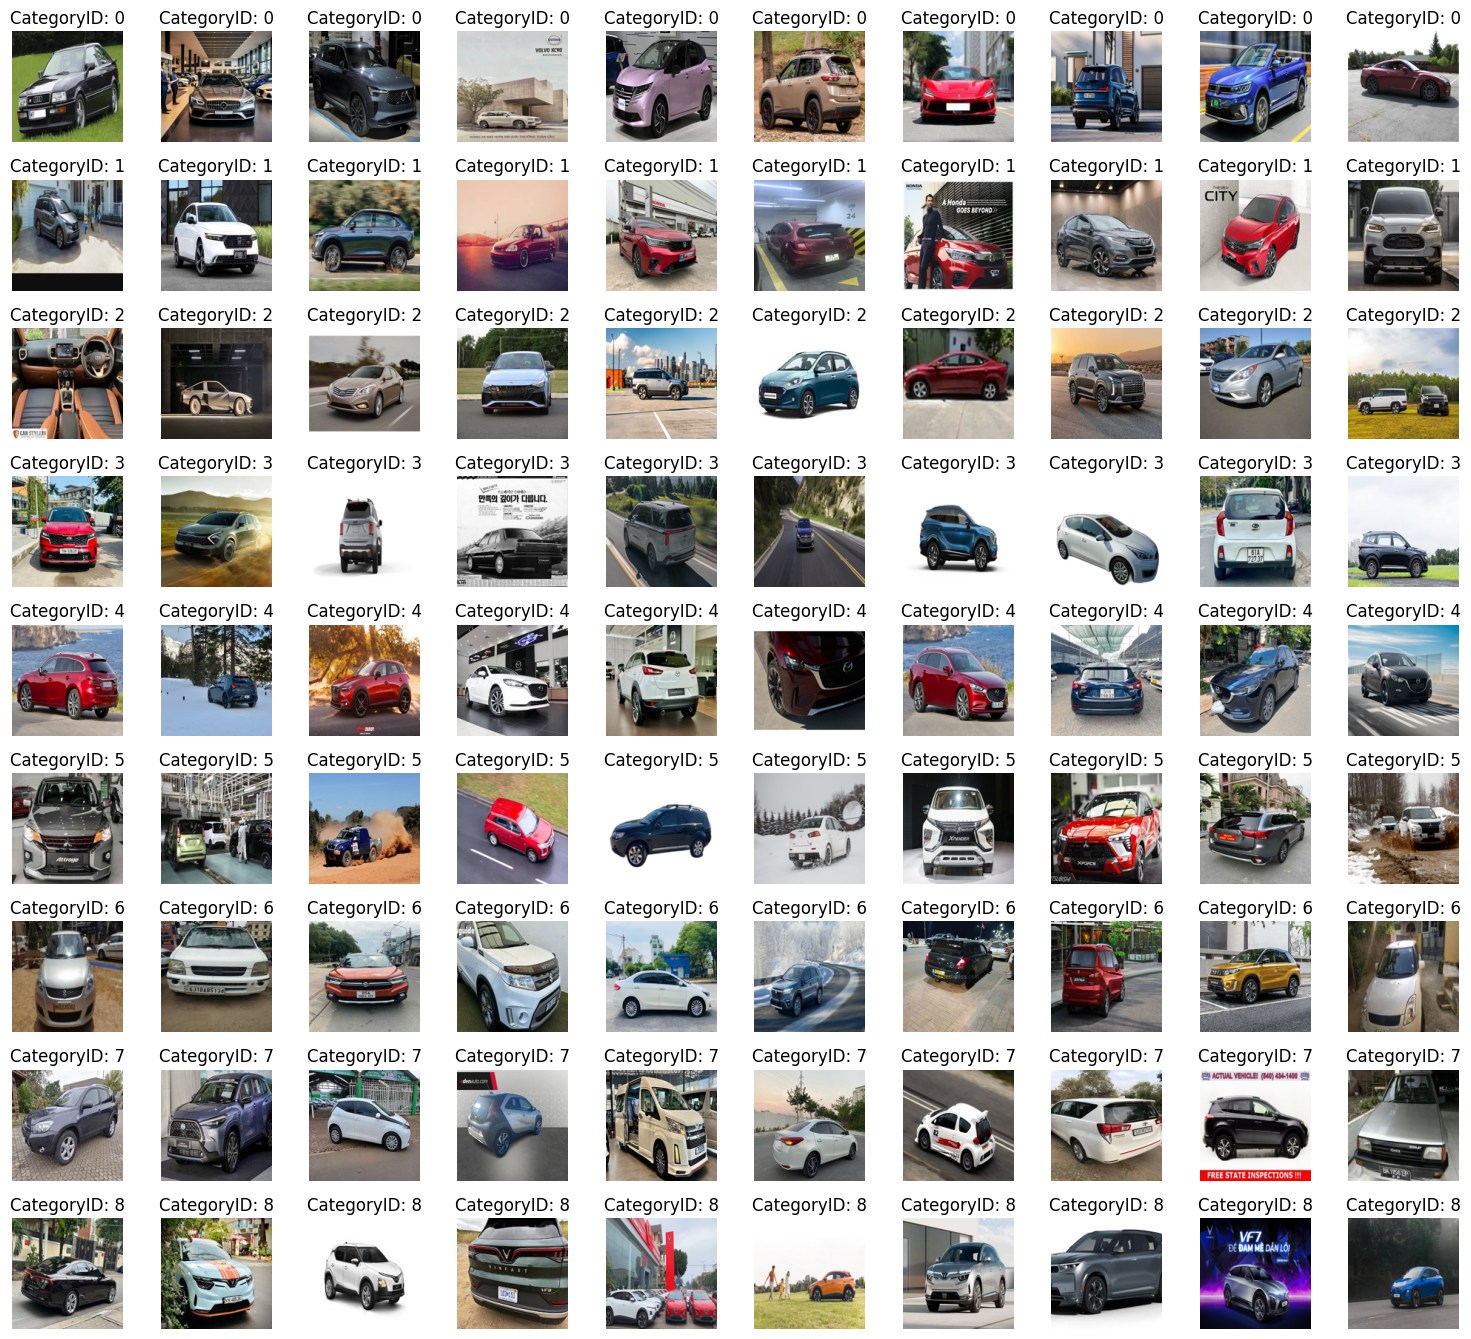

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def Viz_data(path):
    df = pd.read_csv(path)
    grouped = df.groupby('label')

    NumImgsPerRow = 10
    ImgHeight = ImgWidth = 150

    fig, axes = plt.subplots(nrows=len(grouped), ncols=NumImgsPerRow, figsize=(NumImgsPerRow * 1.5, len(grouped) * 1.5))

    if len(grouped) > 1:
        for idx, (label, group) in enumerate(grouped):
            # Chọn ngẫu nhiên ảnh từ mỗi nhóm
            sample_images = group.sample(n=NumImgsPerRow, random_state=42).reset_index(drop=True)

            for j, (index, row) in enumerate(sample_images.iterrows()):
                img_path = row['path']
                img = Image.open(img_path).resize((ImgWidth, ImgHeight))

                ax = axes[idx, j]
                ax.imshow(img)
                ax.set_title(f'CategoryID: {label}')
                ax.axis('off')

    plt.tight_layout()
    plt.show()

Viz_data('/content/CarDataset-Splits-1-Train.csv')


#Classification

In [26]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tqdm import tqdm
# Parameters
base_folder = "/content"  # Base folder where images are stored
csv_file = "car_dataset.csv"  # Path to the dataset CSV file
image_size = (224, 224)  # Image size for EfficientNet
num_classes = 9  # Number of car brands

# Load dataset
# Load dataset
df = pd.read_csv("/content/CarDataset-Splits-2-Train.csv")


# Add the base folder to the image paths (if needed)
df['path'] = df['path'].apply(lambda x: os.path.join(base_folder, x))

# Split into training and testing
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])


In [27]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.utils import to_categorical

def preprocess_image(path, image_size=(224, 224)):
    # Read and decode image file
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)  # Decode image as RGB
    image = tf.image.resize(image, image_size)  # Resize image to desired size
    image = image / 255.0  # Normalize image
    return image

def load_images_in_batch(image_paths, labels, image_size=(224, 224), batch_size=32):
    # Create a dataset of image paths and labels
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(
        lambda path, label: (preprocess_image(path, image_size), label),
        num_parallel_calls=tf.data.AUTOTUNE
    )
    dataset = dataset.batch(batch_size)  # Batch the dataset
    dataset = dataset.prefetch(tf.data.AUTOTUNE)  # Prefetch data for better performance
    return dataset

# Load CSV files containing paths and labels
train_df = pd.read_csv('/content/CarDataset-Splits-1-Train.csv')
test_df = pd.read_csv('/content/CarDataset-Splits-1-Test.csv')

# Extract image paths and labels
train_paths = train_df['path'].values
test_paths = test_df['path'].values
y_train = to_categorical(train_df['label'].values, num_classes=num_classes)
y_test = to_categorical(test_df['label'].values, num_classes=num_classes)

# Load and preprocess training and testing images in batches
image_size = (224, 224)
batch_size = 32  # Adjust based on your GPU capacity

train_dataset = load_images_in_batch(train_paths, y_train, image_size=image_size, batch_size=batch_size)
test_dataset = load_images_in_batch(test_paths, y_test, image_size=image_size, batch_size=batch_size)


In [ ]:
from tensorflow.keras import models, layers

def create_model(input_shape=(224, 224, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(9, activation='softmax')  # Adjust num_classes as needed
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
# Create the model
model = create_model(input_shape=(224, 224, 3), num_classes=10)

# Train the model using the dataset
model.fit(train_dataset, epochs=10, validation_data=test_dataset)


# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")


Epoch 1/10
 12/887 ━━━━━━━━━━━━━━━━━━━━ 1:48:33 7s/step - accuracy: 0.7414 - loss: 0.5926

In [ ]:
model.evaluate(test_generator)

# Save the trained model
model.save('car_brand_classifier_vgg19.h5')

#Clustering

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNet
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
try:
  data_path = '/content/CarDataset-Splits-1-Train.csv'
  df = pd.read_csv(data_path)
except FileNotFoundError:
  print(f'file not found')

Preprocess Images

In [ ]:
from PIL import Image

def preprocess_image(image_path):
    try:
        img = Image.open(image_path)
        if img.mode != 'RGB':
          img = img.convert('RGB')  # If it's not a palette-based image, convert to RGB

        img = img.resize((224, 224))  # Resize for MobileNet
        img_array = np.array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = preprocess_input(img_array)  # Preprocess image for MobileNet
        return img_array

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None


Extracting Feature

In [ ]:
from tensorflow.keras.applications import MobileNet
from tqdm import tqdm

# Load MobileNet model
model = MobileNet(weights='imagenet', include_top=False, pooling='avg')

def preprocess_and_extract_features(image_paths):
    features = []
    with tf.device('/GPU:0'):  # Specify GPU usage
        for path in tqdm(image_paths, desc="Extracting Features", unit="image"):
            preprocessed_image = preprocess_image(path)
            if preprocessed_image is not None:
                # Extract features using MobileNet
                feature = model.predict(preprocessed_image, verbose=0)
                features.append(feature)
    return np.vstack(features)


<ipython-input-13-6c3238ae81fc>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNet(weights='imagenet', include_top=False, pooling='avg')


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Chạy feature extractions

In [ ]:
# Run feature extraction
features = preprocess_and_extract_features(df['path'].values)
# features = np.load('/content/drive/MyDrive/Colab_Notebooks/features.npy')

Extracting Features:  53%|█████▎    | 15061/28198 [2:03:41<2:18:24,  1.58image/s]

Error processing image /content/drive/MyDrive/Colab_Notebooks/Public/Mitsubishi/22521463-22521213-22521259.Mitsubishi.57.jpg: cannot identify image file '/content/drive/.shortcut-targets-by-id/1Uj0V9URNHpzSHeXHSB89AoGCjGki8Yra/Public/Mitsubishi/22521463-22521213-22521259.Mitsubishi.57.jpg'


Extracting Features:  55%|█████▌    | 15626/28198 [2:09:47<2:22:54,  1.47image/s]

Error processing image /content/drive/MyDrive/Colab_Notebooks/Public/Mitsubishi/22520348-22520530-22520837.Mitsubishi.18.jpg: cannot identify image file '/content/drive/.shortcut-targets-by-id/1Uj0V9URNHpzSHeXHSB89AoGCjGki8Yra/Public/Mitsubishi/22520348-22520530-22520837.Mitsubishi.18.jpg'


Extracting Features:  56%|█████▋    | 15917/28198 [2:13:40<2:11:00,  1.56image/s]

Error processing image /content/drive/MyDrive/Colab_Notebooks/Public/Mitsubishi/22521463-22521213-22521259.Mitsubishi.75.jpg: cannot identify image file '/content/drive/.shortcut-targets-by-id/1Uj0V9URNHpzSHeXHSB89AoGCjGki8Yra/Public/Mitsubishi/22521463-22521213-22521259.Mitsubishi.75.jpg'


Extracting Features:  56%|█████▋    | 15918/28198 [2:13:41<1:58:16,  1.73image/s]

Error processing image /content/drive/MyDrive/Colab_Notebooks/Public/Mitsubishi/22521463-22521213-22521259.Mitsubishi.76.jpg: cannot identify image file '/content/drive/.shortcut-targets-by-id/1Uj0V9URNHpzSHeXHSB89AoGCjGki8Yra/Public/Mitsubishi/22521463-22521213-22521259.Mitsubishi.76.jpg'


Extracting Features:  95%|█████████▌| 26862/28198 [3:59:52<20:28,  1.09image/s]

Error processing image /content/drive/MyDrive/Colab_Notebooks/Public/VinFast/22521692-22521676.Vinfast.18.jpg: cannot identify image file '/content/drive/.shortcut-targets-by-id/1Uj0V9URNHpzSHeXHSB89AoGCjGki8Yra/Public/VinFast/22521692-22521676.Vinfast.18.jpg'


Extracting Features:  95%|█████████▌| 26867/28198 [3:59:55<15:18,  1.45image/s]

Error processing image /content/drive/MyDrive/Colab_Notebooks/Public/VinFast/22521692-22521676.Vinfast.94.jpg: cannot identify image file '/content/drive/.shortcut-targets-by-id/1Uj0V9URNHpzSHeXHSB89AoGCjGki8Yra/Public/VinFast/22521692-22521676.Vinfast.94.jpg'


Extracting Features:  95%|█████████▌| 26873/28198 [3:59:59<13:58,  1.58image/s]

Error processing image /content/drive/MyDrive/Colab_Notebooks/Public/VinFast/22521692-22521676.Vinfast.17.jpg: cannot identify image file '/content/drive/.shortcut-targets-by-id/1Uj0V9URNHpzSHeXHSB89AoGCjGki8Yra/Public/VinFast/22521692-22521676.Vinfast.17.jpg'


Extracting Features:  95%|█████████▌| 26884/28198 [4:00:05<11:14,  1.95image/s]

Error processing image /content/drive/MyDrive/Colab_Notebooks/Public/VinFast/22521692-22521676.Vinfast.90.jpg: cannot identify image file '/content/drive/.shortcut-targets-by-id/1Uj0V9URNHpzSHeXHSB89AoGCjGki8Yra/Public/VinFast/22521692-22521676.Vinfast.90.jpg'


Extracting Features:  99%|█████████▉| 27986/28198 [4:11:29<02:00,  1.76image/s]

Error processing image /content/drive/MyDrive/Colab_Notebooks/Public/VinFast/22520348-22520530-22520837.VinFast.30.jpg: cannot identify image file '/content/drive/.shortcut-targets-by-id/1Uj0V9URNHpzSHeXHSB89AoGCjGki8Yra/Public/VinFast/22520348-22520530-22520837.VinFast.30.jpg'


Extracting Features: 100%|██████████| 28198/28198 [4:13:39<00:00,  1.85image/s]


In [ ]:
# Save the features as a NumPy binary file
np.save('/content/features.npy', features)

Now Clustering the images using kmeans

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features)

cluster_labels = kmeans.labels_
df = df.head(len(cluster_labels))
df['cluster'] = cluster_labels

df.to_csv('/content/clustered_data.csv', index=False)


Visualizing

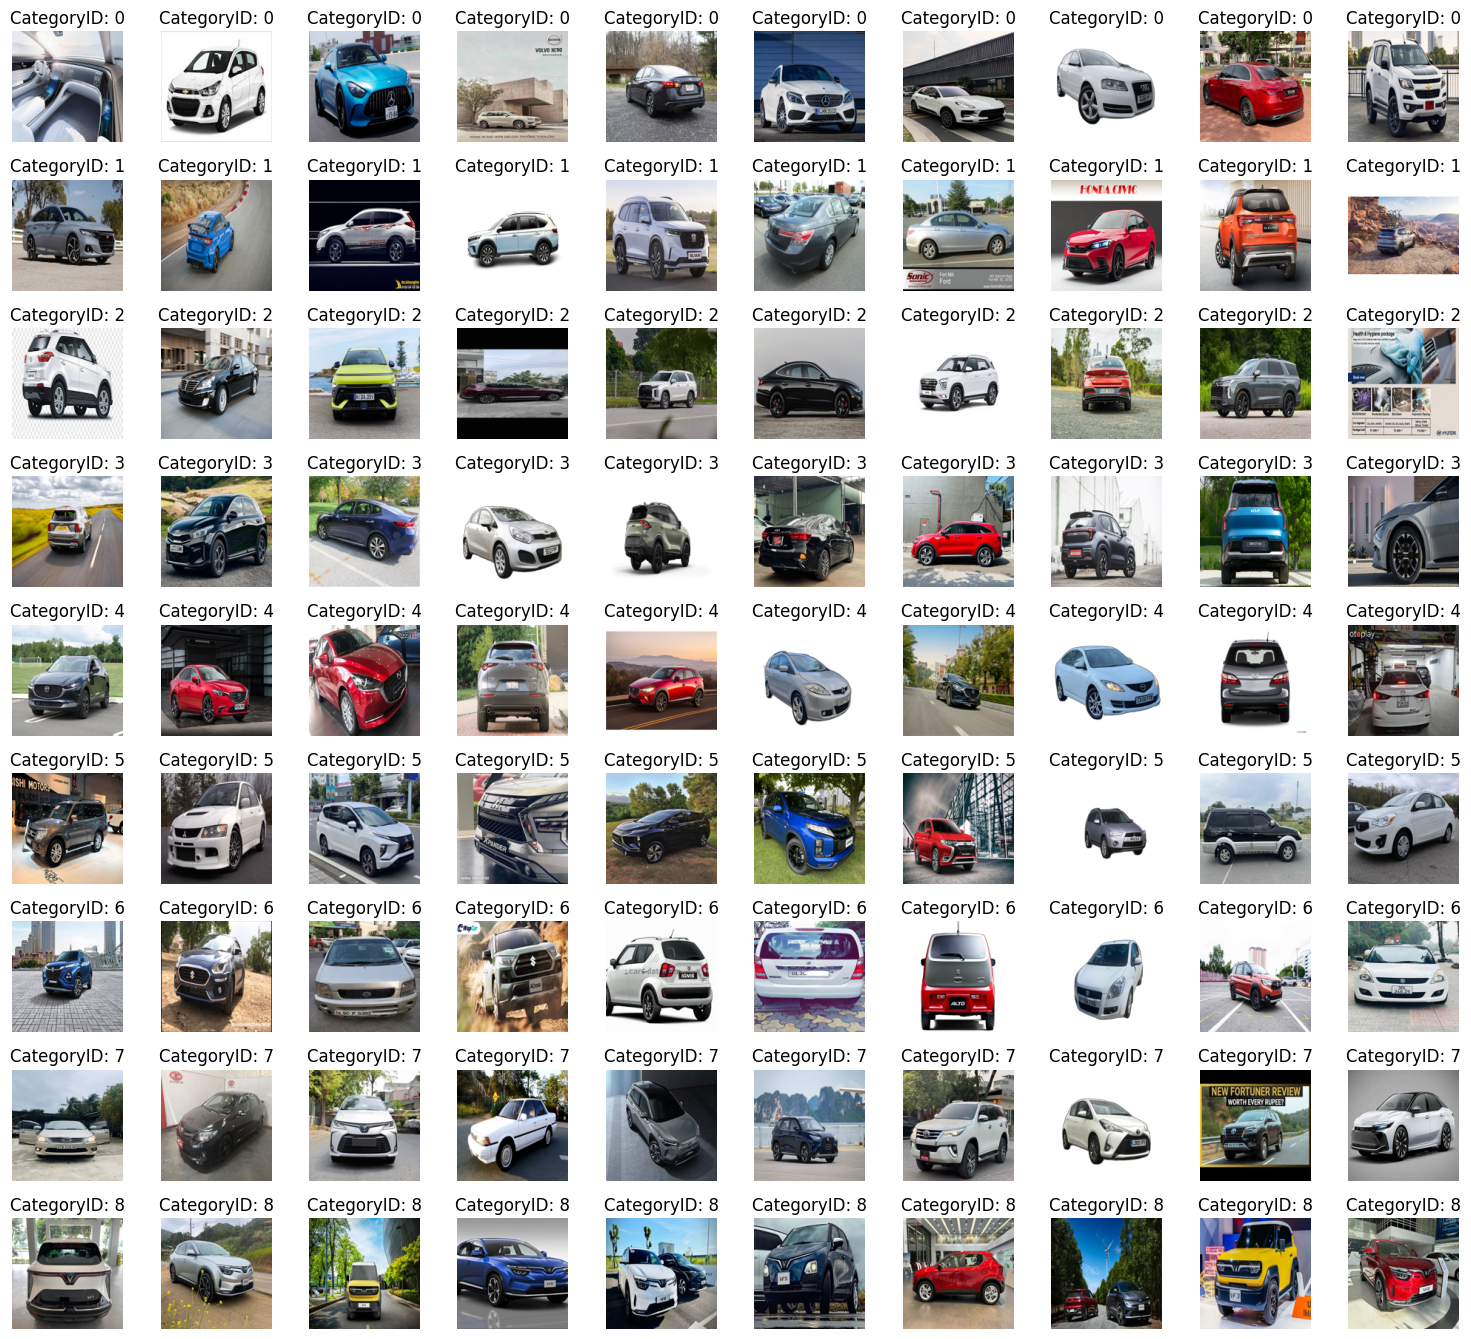

In [ ]:
def Viz_clustered_data(path):
    df = pd.read_csv(path)
    grouped = df.groupby('label')

    NumImgsPerRow = 10
    ImgHeight = ImgWidth = 150

    fig, axes = plt.subplots(nrows=len(grouped), ncols=NumImgsPerRow, figsize=(NumImgsPerRow * 1.5, len(grouped) * 1.5))

    if len(grouped) > 1:
        for idx, (label, group) in enumerate(grouped):
            # Chọn ngẫu nhiên ảnh từ mỗi nhóm
            sample_images = group.sample(n=NumImgsPerRow, random_state=42).reset_index(drop=True)

            for j, (index, row) in enumerate(sample_images.iterrows()):
                img_path = row['path']
                img = Image.open(img_path).resize((ImgWidth, ImgHeight))

                ax = axes[idx, j]
                ax.imshow(img)
                ax.set_title(f'ClusterID: {label}')
                ax.axis('off')

    plt.tight_layout()
    plt.show()

Viz_data('/content/clustered_data.csv')